In [156]:

# Libería Pandas y Numpy
import pandas as pd
import numpy as np

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Relaciones de variables
from scipy.stats import shapiro, kstest

pd.set_option('display.max_columns', None) 
# para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [157]:
df_union_3 = pd.read_csv('Df_union.csv', index_col=None)

In [158]:
## EJERCICIO 3: EVALUACIÓN DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO

In [159]:
df_union_3.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,cancellation_month_year,enrollment_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,0/0,8/2016
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,0/0,3/2013
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,0/0,7/2016
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,0/0,8/2015
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,0/0,1/2014


In [177]:
## 1. PREPARACIÓN DE DATOS: FILTRA EL CONJUNTO DE DATOS PARA INCLUIR ÚNICAMENTE LAS COLUMNAS RELEVANTES: FLIGHTS BOOKED Y EDUCATION


In [170]:
df_union_3['flights_booked'].describe


<bound method NDFrame.describe of 0          3
1         10
2          6
3          0
4          0
          ..
403755     0
403756     0
403757     3
403758     0
403759     0
Name: flights_booked, Length: 403760, dtype: int64>

In [171]:
df_flight_education_2 = df_union_3.groupby('education')['flights_booked'].apply(lambda x: x.mode().iloc[0])
df_flight_education_2

education
Bachelor                0
College                 0
Doctor                  0
High School or Below    0
Master                  0
Name: flights_booked, dtype: int64

In [162]:

df_flight_education = df_union_3[['flights_booked','education']].value_counts()
df_flight_education

flights_booked  education           
0               Bachelor                123264
                College                  49426
3               Bachelor                 11436
11              Bachelor                  9709
5               Bachelor                  9444
                                         ...  
19              Master                      36
21              Doctor                      25
20              Master                      23
21              High School or Below        18
                Master                      17
Name: count, Length: 110, dtype: int64

In [172]:
df_union_3['flights_booked'].min()

0

In [174]:
df_union_3['flights_booked'].max()

21

In [175]:
df_union_3['flights_booked'].info

<bound method Series.info of 0          3
1         10
2          6
3          0
4          0
          ..
403755     0
403756     0
403757     3
403758     0
403759     0
Name: flights_booked, Length: 403760, dtype: int64>

In [176]:
df_union_3['flights_booked'].value_counts()

flights_booked
0     196128
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

In [178]:
df_union_3['education'].value_counts()


education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

In [179]:
df_union_3['education'].tolist()

['Bachelor',
 'College',
 'College',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Master',
 'Bachelor',
 'Master',
 'College',
 'Bachelor',
 'Master',
 'College',
 'College',
 'College',
 'Bachelor',
 'High School or Below',
 'Bachelor',
 'Bachelor',
 'College',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'College',
 'Bachelor',
 'Doctor',
 'Master',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'College',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'College',
 'College',
 'Bachelor',
 'College',
 'Bachelor',
 'Doctor',
 'Bachelor',
 'High School or Below',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'College',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'College',
 'Bachelor',
 'College',
 'Bachelor',
 'College',
 'College',
 'Doctor',
 'Bachelor',
 'High School or Below',
 'Bachelor',
 'College',
 'Bachelor',
 'Bachelor',
 'Bachelor',
 'High School or Belo

In [180]:
df_union_3['education'].describe()

count       403760
unique           5
top       Bachelor
freq        252567
Name: education, dtype: object

In [181]:
df_union_3.isnull().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102260
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
cancellation_month_year             0
enrollment_month_year               0
dtype: int64

In [ ]:
## 2. ANALISIS DESCRIPTIVO: AGRUPA LOS DATOS POR NIVEL EDUCATIVO Y CALCULA ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
# (PROMEDIO, DESVIACIÓN ESTÁNDAR) DEL NUMERO DE VUELOS RESERVADOS PARA CADA GRUPO


In [220]:
education_flight = df_union_3.groupby('education')
education_flight.describe().T

education                  Bachelor        College         Doctor  \
loyalty_number count  252567.000000  102260.000000   17731.000000   
               mean   548114.325134  549280.619010  570327.226834   
               std    260447.229088  255249.759603  254389.869544   
               min    100018.000000  100102.000000  101594.000000   
               25%    323011.500000  330053.000000  355994.000000   
...                             ...            ...            ...   
clv            min      2255.310000    1898.010000    2119.890000   
               25%      4142.560000    3747.060000    4046.940000   
               50%      5866.420000    5568.950000    5623.310000   
               75%      9080.640000    8500.120000    8583.270000   
               max     83325.380000   74228.520000   58207.130000   

education             High School or Below         Master  
loyalty_number count          18915.000000   12287.000000  
               mean          557841.598784  549248.162448  
               std           258899.087562  264145.849788  
               min           101148.000000  100644.000000  
               25%           331325.000000  316746.500000  
...                                    ...            ...  
clv            min             2272.340000    2174.110000  
               25%             3707.280000    3600.930000  
               50%             5274.200000    5140.390000  
               75%             8991.980000   10083.490000  
               max            43290.500000   30591.610000  

[96 rows x 5 columns]

In [185]:
# Rellenar NaN con 0
df_NaN_education_flight = df_union_3.fillna(0)
df_NaN_education_flight


# Rellenar NaN con la media de la columna
df_filled_mean = df_union_3.fillna(df_union_3['flights_booked'].mean())

print("\nDataFrame con NaN reemplazados por la media:")
print(df_filled_mean)



DataFrame con NaN reemplazados por la media:
        loyalty_number  year  month  flights_booked  flights_with_companions  \
0               100018  2017      1               3                        0   
1               100102  2017      1              10                        4   
2               100140  2017      1               6                        0   
3               100214  2017      1               0                        0   
4               100272  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
403755          999902  2018     12               0                        0   
403756          999911  2018     12               0                        0   
403757          999940  2018     12               3                        0   
403758          999982  2018     12               0                        0   
403759          999986  2018     12               0                       

In [186]:
df_union_3.groupby('education')['flights_booked'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [187]:
# MEDIA
education_flight = df_union_3.groupby('education')['flights_booked'].mean()
education_flight

education
Bachelor                4.110288
College                 4.169744
Doctor                  4.175512
High School or Below    4.176209
Master                  4.200700
Name: flights_booked, dtype: float64

In [ ]:
df_flight_education.head()

,education,flights_booked
0,Bachelor,4.110288
1,College,4.169744
2,Doctor,4.175512
3,High School or Below,4.176209
4,Master,4.200700


In [188]:
df_union_3.min()

loyalty_number                         100018
year                                     2017
month                                       1
flights_booked                              0
flights_with_companions                     0
total_flights                               0
distance                                    0
points_accumulated                        0.0
points_redeemed                             0
dollar_cost_points_redeemed                 0
country                                Canada
province                              Alberta
city                                    Banff
postal_code                           A1C 6H9
gender                                 Female
education                            Bachelor
salary                                 9081.0
marital_status                       Divorced
loyalty_card                           Aurora
clv                                   1898.01
enrollment_type                2018 Promotion
cancellation_month_year           

In [189]:
df_union_3.max()

loyalty_number                   999986
year                               2018
month                                12
flights_booked                       21
flights_with_companions              11
total_flights                        32
distance                           6293
points_accumulated                676.5
points_redeemed                     876
dollar_cost_points_redeemed          71
country                          Canada
province                          Yukon
city                           Winnipeg
postal_code                     Y2K 6R0
gender                             Male
education                        Master
salary                         407228.0
marital_status                   Single
loyalty_card                       Star
clv                            83325.38
enrollment_type                Standard
cancellation_month_year          9/2018
enrollment_month_year            9/2018
dtype: object

In [190]:
df_union_3.groupby('education')[['flights_booked']].describe().T



education                  Bachelor        College        Doctor  \
flights_booked count  252567.000000  102260.000000  17731.000000   
               mean        4.110288       4.169744      4.175512   
               std         5.221671       5.246040      5.256971   
               min         0.000000       0.000000      0.000000   
               25%         0.000000       0.000000      0.000000   
               50%         1.000000       1.000000      1.000000   
               75%         8.000000       8.000000      8.000000   
               max        21.000000      21.000000     21.000000   

education             High School or Below        Master  
flights_booked count          18915.000000  12287.000000  
               mean               4.176209      4.200700  
               std                5.239267      5.213956  
               min                0.000000      0.000000  
               25%                0.000000      0.000000  
               50%                1.000000      1.000000  
               75%                8.000000      8.000000  
               max               21.000000     21.000000

In [193]:
df_union_3['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [195]:
varianza_flights_booked = df_union_3['flights_booked'].var()
varianza_flights_booked

27.353566562116004

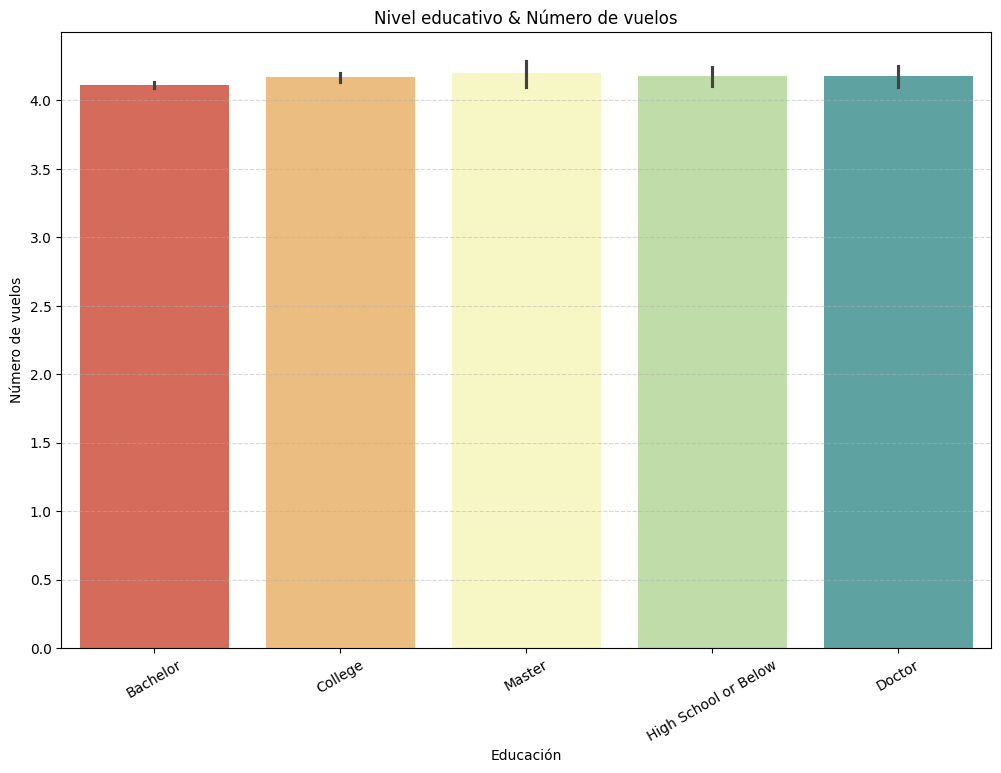

In [197]:
plt.figure(figsize=(12, 8))
sns.barplot(x='education', y='flights_booked', data=df_union_3, palette='Spectral')
plt.title('Nivel educativo & Número de vuelos')
plt.xlabel('Educación')
plt.ylabel('Número de vuelos')
plt.xticks(rotation=30)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
## 3. PRUEBA ESTADÍSTICA: REALIZA UNA PRUEBA DE HIPÓTESIS PARA DETERMINAR SI EXISTE UNA DIFERENCIA SIGNIFICATIVA EN EL NUMERO DE VUELOS RESERVADOS ENTRE LOS DIFERENTES NIVELES EDUCATIVOS.

In [215]:
def education_group(type_education):
    if type_education in ['Bachelor','Master', 'Doctor']:
        return 'education superior' 
    else:
        return 'education basic'

In [216]:
df_union_3['type_education'] = df_union_3['education'].apply(education_group)

In [219]:
df_union_3['type_education'].sample(10)

226765    education superior
910       education superior
152535    education superior
290622    education superior
296292       education basic
322829    education superior
264300    education superior
34815        education basic
15228        education basic
403556    education superior
Name: type_education, dtype: object

In [218]:
education_info = df_union_3.groupby("type_education")["flights_booked"].describe().T

education_info

type_education,education basic,education superior
count,121175.000000,282585.000000
mean,4.170753,4.118311
std,5.244962,5.223592
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,8.000000,8.000000
max,21.000000,21.000000
